In [1]:
from demoware import vectorize
import numpy as np

### GELU a "high-performing neural network activation function": 

From paper: https://arxiv.org/pdf/1606.08415

$GELU(x) \approx 0.5x(1 + \tanh{[\sqrt{(2/\pi)}(x + 0.044715x^3)]})$

The following implementation is based on that in LinkedIn's Liger-Kernel project https://github.com/linkedin/Liger-Kernel/blob/ba72b8e249bd04e798aa85e5d6f072feabed23c1/src/liger_kernel/ops/geglu.py#L22-L44 which is licensed under a `BSD 2-CLAUSE LICENSE`: https://github.com/linkedin/Liger-Kernel/blob/ba72b8e249bd04e798aa85e5d6f072feabed23c1/LICENSE, details below.

<details>

```
BSD 2-CLAUSE LICENSE
Copyright 2024 LinkedIn Corporation 
All Rights Reserved.
Redistribution and use in source and binary forms, with or
without modification, are permitted provided that the following
conditions are met:
1. Redistributions of source code must retain the above copyright
notice, this list of conditions and the following disclaimer.
2. Redistributions in binary form must reproduce the above
copyright notice, this list of conditions and the following
disclaimer in the documentation and/or other materials provided
with the distribution.
THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS
"AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT
LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR
A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT
HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL,
SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT
LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE,
DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY
THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
(INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```

</details>

In [2]:
@vectorize("float32(float32)")
def gelu(a):
    dt = np.float32
    r = (dt(0.5) * a * (dt(1) + np.tanh(np.sqrt(dt(2) / dt(np.pi)) * (a + dt(0.044715) * a ** 3))))
    return r

In [3]:
n = 1000
x = np.linspace(-3, 4, n, dtype=np.float32)

In [4]:
import matplotlib.pyplot as plt

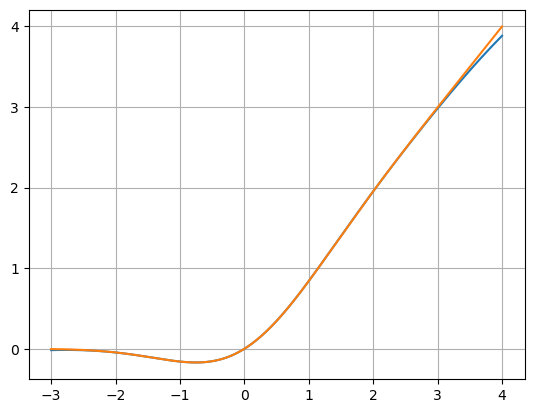

In [5]:
fig, ax = plt.subplots()
ax.plot(x, gelu(x), x, gelu.py_func(x))
ax.grid()
plt.show()